Ginny Green is a high school senior who is trying to choose a major. She only wants a major that has the same first letter as her name does, and she wants to know what field each major is in so that she can get a picture of what the broader industry might look like. She would like a major with a lower than average unemployment rate, and she doesn't want to major in something where graduates in the 25th lowest percentile make substantially less than average. She also wants to major in something relatively popular; if something's popular, it must be a good idea.

In this .ipynb file 3 graphs will be created to help Ginny understand data from a FiveThirtyEight csv and make a decision.

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt# data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import seaborn as sns
import matplotlib.ticker as mtick
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/college-major-data/college-major-data.csv


In [2]:
majors = pd.read_csv('/kaggle/input/college-major-data/college-major-data.csv')
conn = sqlite3.connect('college-major-data.db')
majors.to_sql('majors', conn, if_exists = 'replace', index = False)

# Creating the master dataframe(un_df), the avg. unemployment per category dtaframe (cat_df), and the dataframe with all of the majors that start with 'g' (g_df)

In [3]:
qry = """
SELECT LOWER(Major) as 'Major',Major_category, Total, Unemployment_rate, P25th from majors
ORDER BY Total DESC
"""
un_df = pd.read_sql(qry, conn)
un_df.set_index('Major')
list_un = [i.lower() for i in (un_df['Major']).tolist()]

In [4]:
g_df = un_df[un_df['Major'].str[0] == 'g']
g_df = g_df.sort_values(by = 'Major_category')
list_g = [i.lower() for i in (g_df['Major']).tolist()]

In [5]:
cat_set_g = set([i for i in un_df['Major_category']])
major_cat = []
un_rate = []
for c in cat_set_g:
        for j in g_df.isin([c])['Major_category']:
            if j == True:
                avg = (un_df[un_df['Major_category'] == c]).mean()
                major_cat.append(c)
                un_rate.append(avg['Unemployment_rate'])
un_cat_dict = {'Major_category':major_cat, 'Unemployment_rate':un_rate}
cat_df = pd.DataFrame(un_cat_dict)
cat_df = cat_df.drop_duplicates()
cat_df = cat_df.sort_values(by = 'Major_category')
cat_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,Major_category,Unemployment_rate
4,Agriculture & Natural Resources,0.039569
1,Biology & Life Science,0.049936
3,Business,0.054496
0,Education,0.046762
5,Engineering,0.050630
2,Health,0.047209
7,Physical Sciences,0.054541
9,Social Science,0.065686


In [6]:
g_df = g_df.append({'Major': 'Average (All majors)', 'Major_category': 'Avg', 'Total': (g_df['Total'].sum()) , 'Unemployment_rate':(un_df['Unemployment_rate'].mean()), 'P25th': (un_df['P25th'].mean())}, ignore_index=True)
g_df

,Major,Major_category,Total,Unemployment_rate,P25th
0,general agriculture,Agriculture & Natural Resources,128148,0.026147,34000.000000
1,genetics,Biology & Life Science,6362,0.041591,33000.000000
2,general business,Business,2148712,0.051378,40000.000000
3,general education,Education,1438867,0.043904,32000.000000
4,general engineering,Engineering,503080,0.047688,50000.000000
5,geological and geophysical engineering,Engineering,6264,0.000000,55000.000000
6,general medical and health services,Health,104516,0.054701,35000.000000
7,geology and earth science,Physical Sciences,107902,0.065111,42000.000000
8,geosciences,Physical Sciences,8267,0.042792,36000.000000
9,general social sciences,Social Science,127363,0.071057,35000.000000


# Creating the plot(s)

In [7]:
lav = '#9292dd'
mycolors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9d52f", "#d0ee11", lav]
majors = ['General Agriculture','Genetics','General Business','General Education','General Engineering','Geological Engineering','General Medical and Health Services', 'Geology', 'Geosciences', 'General Social Sciences', 'Geography', 'Average(All majors)']
sns.set_palette(sns.color_palette(mycolors))

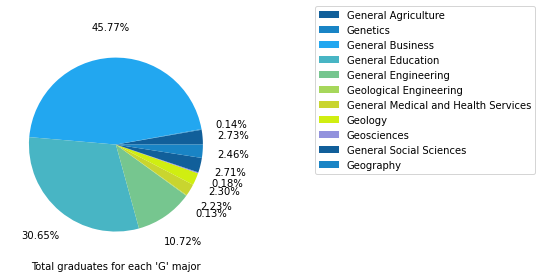

In [8]:
(g_df.drop(11)).plot.pie(x = 'Major', y = 'Total', labels = majors, autopct='%1.2f%%', pctdistance=1.35, labeldistance = None)
plt.legend(loc=5, bbox_to_anchor = (2.45,0.75))
plt.ylabel(ylabel = None)
plt.xlabel(xlabel = 'Total graduates for each \'G\' major')
plt.savefig('total_grads_pieplot',dpi=300, bbox_inches = "tight")

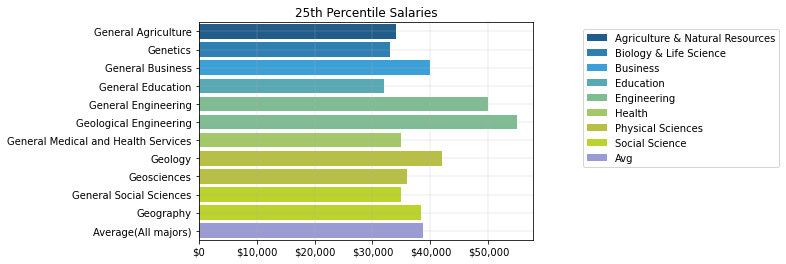

In [9]:
ax = sns.barplot(y ='Major', x = 'P25th', hue = 'Major_category', data = g_df, orient = 'h', dodge = False)
ax.set_yticklabels(labels = majors)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title(label = '25th Percentile Salaries')
plt.grid(linewidth = 0.25)
plt.rcParams["figure.figsize"] = (5,3)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.legend(loc=5, bbox_to_anchor = (1.75,0.65))
plt.savefig('lower25th',dpi=300, bbox_inches = "tight")

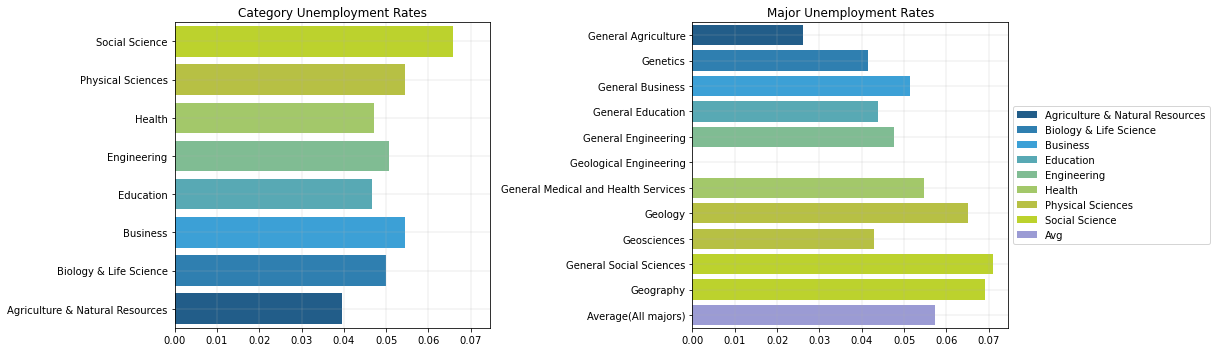

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(17, 5), sharex = True)

mycolors2 =["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9d52f", "#d0ee11"]
sns.set_palette(sns.color_palette(mycolors2))
y_indexes = np.arange(len(g_df['Major']))

sns.barplot(y = 'Major_category', x = 'Unemployment_rate', data = cat_df, orient = 'h', dodge = False, ax = axes[0])
sns.set_palette(sns.color_palette(mycolors))
sns.barplot(y = y_indexes, x = 'Unemployment_rate', hue = 'Major_category', data = g_df, orient = 'h', dodge = False, ax = axes[1])

axes[0].set_title('Category Unemployment Rates')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].legend([], frameon = False)
axes[0].invert_yaxis()
axes[0].grid(linewidth=0.25)

axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[1].set_title('Major Unemployment Rates')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].grid(linewidth=0.25)
axes[1].set_yticklabels(labels = (majors))

fig.tight_layout()
plt.savefig('cat_and_majors_barchart',dpi=300, bbox_inches = "tight")
plt.show()